In [6]:
import glob
import numpy as np
import librosa
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import vega
import altair as alt
import pandas as pd
import scipy.signal
import scipy.fftpack as fft
from keras.layers import Input, Dense
from keras.models import Model

Visualization...


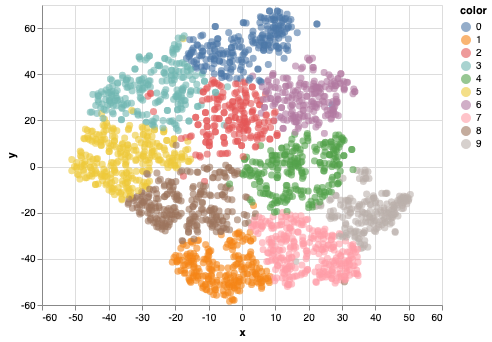

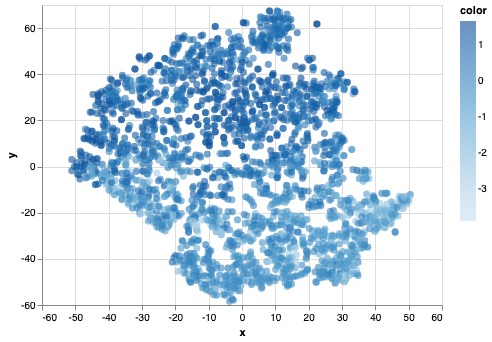

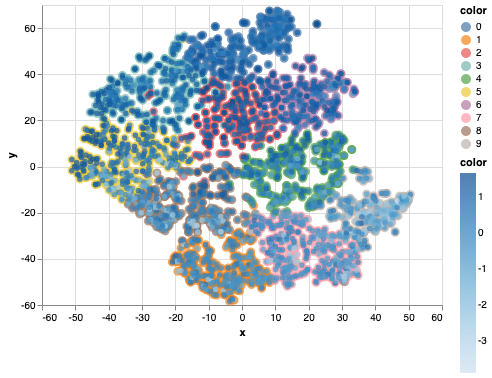

In [37]:
# #---File reading---#
# print('File reading...')
# all_dirs = []
# for root, dirs, files in os.walk('./Dataset'):
#         for name in files:
#             if '.wav' in name:
#                 filedir = os.path.join(root, name)
#                 all_dirs.append(filedir)
# file_no = len(all_dirs)
# print('Number of files: ' + str(file_no))

# #---Feature Computation---#
# print('Feature Computation...')
# all_mel = []
# file_names = []
# for i in range(file_no):
#     if (librosa.get_duration(filename=all_dirs[i]) == 15.):
#         file_names.append(all_dirs[i])
        
#         #Progress report
#         #print(str(i) + '/' + str(file_no))
#         if (i==file_no-1):
#             print('---> Progress: 100%')
#         elif (i==int(file_no*0.75)):
#             print('---> Progress: 75%')
#         elif (i==int(file_no*0.5)):
#             print('---> Progress: 50%')
#         elif (i==int(file_no*0.25)):
#             print('---> Progress: 25%')

#         #Load file
#         y, sr = librosa.core.load(all_dirs[i])
#         #Features
#         mel = librosa.feature.melspectrogram(y=y, sr=sr)
#         all_mel.append(mel.flatten())
        
# print('Number of files with a duration of 15 seconds: ' + str(len(file_names)))

# #---Principal Component Analysis---#
# print('Principal Component Analysis...')
# all_mel_pca5 = PCA(n_components=5).fit_transform(all_mel)
# all_mel_pca10 = PCA(n_components=10).fit_transform(all_mel)
# all_mel_pca20 = PCA(n_components=20).fit_transform(all_mel)
# all_mel_pca50 = PCA(n_components=50).fit_transform(all_mel)

# #---Component Standardization---#
# print('Component Standardization...')
# scl1 = StandardScaler()
# all_mel_pca5_scaled = scl1.fit_transform(all_mel_pca5)
# scl2 = StandardScaler()
# all_mel_pca10_scaled = scl1.fit_transform(all_mel_pca10)
# scl3 = StandardScaler()
# all_mel_pca20_scaled = scl1.fit_transform(all_mel_pca20)
# scl4 = StandardScaler()
# all_mel_pca50_scaled = scl1.fit_transform(all_mel_pca50)


# #---t-SNE---#
# print('t-SNE...')
# all_mel_pca5_scaled_red2 = TSNE(n_components=2).fit_transform(all_mel_pca5_scaled)
# all_mel_pca10_scaled_red2 = TSNE(n_components=2).fit_transform(all_mel_pca10_scaled)
all_mel_pca20_scaled_red2 = TSNE(n_components=2).fit_transform(all_mel_pca20_scaled)
# all_mel_pca50_scaled_red2 = TSNE(n_components=2).fit_transform(all_mel_pca50_scaled)

# #---KMeans---#
# print('KMeans...')
# kmeans1 = KMeans(n_clusters=10, random_state=42).fit(all_mel_pca5_scaled_red2)
# clusters1 = kmeans1.predict(all_mel_pca5_scaled_red2)
# kmeans2 = KMeans(n_clusters=5, random_state=42).fit(all_mel_pca10_scaled_red2)
# clusters2 = kmeans2.predict(all_mel_pca10_scaled_red2)
kmeans3 = KMeans(n_clusters=10, random_state=None).fit(all_mel_pca20_scaled_red2)
clusters3 = kmeans3.predict(all_mel_pca20_scaled_red2)
# kmeans4 = KMeans(n_clusters=5, random_state=42).fit(all_mel_pca50_scaled_red2)
# clusters4 = kmeans4.predict(all_mel_pca50_scaled_red2)

# #---Intensity---#
# print('Intensity...')
# all_db = []
# for i in range(file_no):
#     if (librosa.get_duration(filename=all_dirs[i]) == 15.):
        
#         #Progress report
#         if (i==file_no-1):
#             print('---> Progress: 100%')
#         elif (i==int(file_no*0.75)):
#             print('---> Progress: 75%')
#         elif (i==int(file_no*0.5)):
#             print('---> Progress: 50%')
#         elif (i==int(file_no*0.25)):
#             print('---> Progress: 25%')

#         #Load file
#         y, sr = librosa.core.load(all_dirs[i])
#         #Features
#         stft = librosa.core.stft(y=y)
#         db = librosa.core.power_to_db(stft)
#         all_db.append(np.mean(db)) 

# #---Intensity Standardization---#
# print('Intensity Standardization...')
# scl5 = StandardScaler()
# all_db_scaled = scl1.fit_transform((np.asarray(all_db)).reshape(-1, 1))
# all_db_scaled = all_db_scaled.reshape(1,-1)

# #---Scatter---#
# print('Preparing dataframe...')
# xmel5 = []
# ymel5 = []
# for i in range(len(all_mel_pca5_scaled_red2)):
#     xmel5.append(all_mel_pca5_scaled_red2[i][0])
#     ymel5.append(all_mel_pca5_scaled_red2[i][1])
# xmel10 = []
# ymel10 = []
# for i in range(len(all_mel_pca10_scaled_red2)):
#     xmel10.append(all_mel_pca10_scaled_red2[i][0])
#     ymel10.append(all_mel_pca10_scaled_red2[i][1])
# xmel20 = []
# ymel20 = []
# for i in range(len(all_mel_pca20_scaled_red2)):
#     xmel20.append(all_mel_pca20_scaled_red2[i][0])
#     ymel20.append(all_mel_pca20_scaled_red2[i][1])
# xmel50 = []
# ymel50 = []
# for i in range(len(all_mel_pca50_scaled_red2)):
#     xmel50.append(all_mel_pca50_scaled_red2[i][0])
#     ymel50.append(all_mel_pca50_scaled_red2[i][1])

# #---Dataframes---#
# df11 = pd.DataFrame({'x': xmel5, 'y': ymel5, 'color': clusters1, 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})
# df12 = pd.DataFrame({'x': xmel5, 'y': ymel5, 'color': all_db_scaled[0], 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})

# df21 = pd.DataFrame({'x': xmel10, 'y': ymel10, 'color': clusters2, 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})
# df22 = pd.DataFrame({'x': xmel10, 'y': ymel10, 'color': all_db_scaled[0], 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})

df31 = pd.DataFrame({'x': xmel20, 'y': ymel20, 'color': clusters3, 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})
df32 = pd.DataFrame({'x': xmel20, 'y': ymel20, 'color': all_db_scaled[0], 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})

# df41 = pd.DataFrame({'x': xmel50, 'y': ymel50, 'color': clusters4, 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})
# df42 = pd.DataFrame({'x': xmel50, 'y': ymel50, 'color': all_db_scaled[0], 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})

#---Visualization declerations---#
print('Visualization...')
#Clusters
chart11 = alt.Chart(df11).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Intensity
chart12 = alt.Chart(df12).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()
#Overlap Clusters
chart13 = alt.Chart(df11).mark_circle(size=80).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Overlap Intensity
chart14 = alt.Chart(df12).mark_circle(size=30).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

#Clusters
chart21 = alt.Chart(df21).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Intensity
chart22 = alt.Chart(df22).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()
#Overlap Clusters
chart23 = alt.Chart(df21).mark_circle(size=80).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Overlap Intensity
chart24 = alt.Chart(df22).mark_circle(size=30).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

#Clusters
chart31 = alt.Chart(df31).mark_circle(opacity=0.6, size=50).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Intensity
chart32 = alt.Chart(df32).mark_circle(opacity=0.6, size=50).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()
#Overlap Clusters
chart33 = alt.Chart(df31).mark_circle(size=80).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Overlap Intensity
chart34 = alt.Chart(df32).mark_circle(size=30).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

#Clusters
chart41 = alt.Chart(df41).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Intensity
chart42 = alt.Chart(df42).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()
#Overlap Clusters
chart43 = alt.Chart(df41).mark_circle(size=80).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
#Overlap Intensity
chart44 = alt.Chart(df42).mark_circle(size=30).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

#---Display---#
# display(chart11)
# display(chart12)
# display(chart13 + chart14)

# display(chart21)
# display(chart22)
# display(chart23 + chart24)

display(chart31)
display(chart32)
display(chart33 + chart34)

# display(chart41)
# display(chart42)
# display(chart43 + chart44)